In [1]:
import diplib as dp
import cv2
import numpy as np
import matplotlib.pyplot as plt
from inpaint import *
import inpaint
from util import *







DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


In [1]:

# Load the image
name='resources/image4.jpg'
name_mask='resources/mask4.jpg'


img = cv2.imread(name)
img_mask=cv2.imread(name_mask,cv2.IMREAD_GRAYSCALE)
img_mask = cv2.bitwise_not(img_mask)
img_mask = cv2.threshold(img_mask, 127, 255, cv2.THRESH_BINARY)[1]


# source_region_mask = cv2.bitwise_not(img_mask)
source_region_mask = (img_mask)
source_indices_mask=np.array(np.where(source_region_mask==255)).T
mean_times = []
remaining_pixels = []
patch_sizes = range(1, 15,1)
iterations = 30
for patch_size in patch_sizes:
    inpaint_obj = inpaint.Inpainting(img, source_indices_mask, patch_size=patch_size)
    inpaint_obj.in_paint_alg(iterations)
    mean_times.append(sum(inpaint_obj.total_time)/iterations)
    remaining_pixels.append(inpaint_obj.pixel_remaining[-1])


fig, ax1 = plt.subplots()

# Plot mean times
ax1.plot(np.array(patch_sizes)*2+1, mean_times, 'b-')
ax1.set_xlabel('Patch Size (pixels)')
ax1.set_ylabel('Mean Patch Fill Time(s)', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot remaining pixels
ax2.plot(np.array(patch_sizes)*2+1, remaining_pixels, 'r-')
ax2.set_ylabel('Remaining Pixels', color='r')
ax2.tick_params('y', colors='r')

# plt.title('Mean patch fill time and Remaining Pixels vs Patch Size')
plt.savefig('patch_vs_time.png')
plt.show()

NameError: name 'inpaint' is not defined

In [18]:
# Load the image
name='resources/image77.jpg'
name_mask='resources/mask7.jpg'


img = cv2.imread(name)
img_mask=cv2.imread(name_mask,cv2.IMREAD_GRAYSCALE)
img_mask = cv2.bitwise_not(img_mask)
img_mask = cv2.threshold(img_mask, 127, 255, cv2.THRESH_BINARY)[1]


# source_region_mask = cv2.bitwise_not(img_mask)
source_region_mask = (img_mask)
source_indices_mask=np.array(np.where(source_region_mask==255)).T

inpaint_obj = inpaint.Inpainting(img, source_indices_mask, patch_size=4)
inpaint_obj.in_paint_alg(name="image7")


<Figure size 640x480 with 0 Axes>

In [2]:

# Define the grid size and number of skips
grid_size = (1, 4)
num_skips = 30
width = 20
height = 5
fig, axes = plt.subplots(*grid_size)
fig.set_dpi(800)
fig.set_size_inches(width, height)

# Iterate over the grid and plot the images
for i, ax in enumerate(axes.flat):
    # Calculate the image index
    image_index = i * (num_skips + 1)+1
    
    # Load and plot the image
    image_path = f'./image7iter/contour_img_{image_index}.png'
    image = plt.imread(image_path)
    
    # Set the size of each axes in the grid
    axes_size = (4, 4)  # Specify the size of each axes in inches
    fig.set_size_inches(axes_size[0] * grid_size[1], axes_size[1] * grid_size[0])
       
    # Adjust the spacing between subplots
    fig.subplots_adjust(wspace=0, hspace=0)
    
    # Remove axes labels
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    ax.imshow(image)
    ax.title.set_text(f'Iteration {image_index}')
  
# Adjust the spacing between subplots
fig.tight_layout()

# Show the grid of images
plt.show()

KeyboardInterrupt: 

In [6]:
# Load the image
name='resources/ken2.jpg'
name_mask='resources/ken2_mask.jpg'

img = cv2.imread(name)
# Apply Gaussian blur to the image
img_blur = cv2.GaussianBlur(img, (3, 3), 0)
img_mask=cv2.imread(name_mask,cv2.IMREAD_GRAYSCALE)
img_mask = cv2.bitwise_not(img_mask)
img_mask = cv2.threshold(img_mask, 127, 255, cv2.THRESH_BINARY)[1]


# source_region_mask = cv2.bitwise_not(img_mask)
source_region_mask = (img_mask)
source_indices_mask=np.array(np.where(source_region_mask==255)).T

inpaint_obj = inpaint.Inpainting(img_blur, source_indices_mask, patch_size=2)
inpaint_obj.in_paint_alg(iterations=10000,name="ken")

<Figure size 640x480 with 0 Axes>

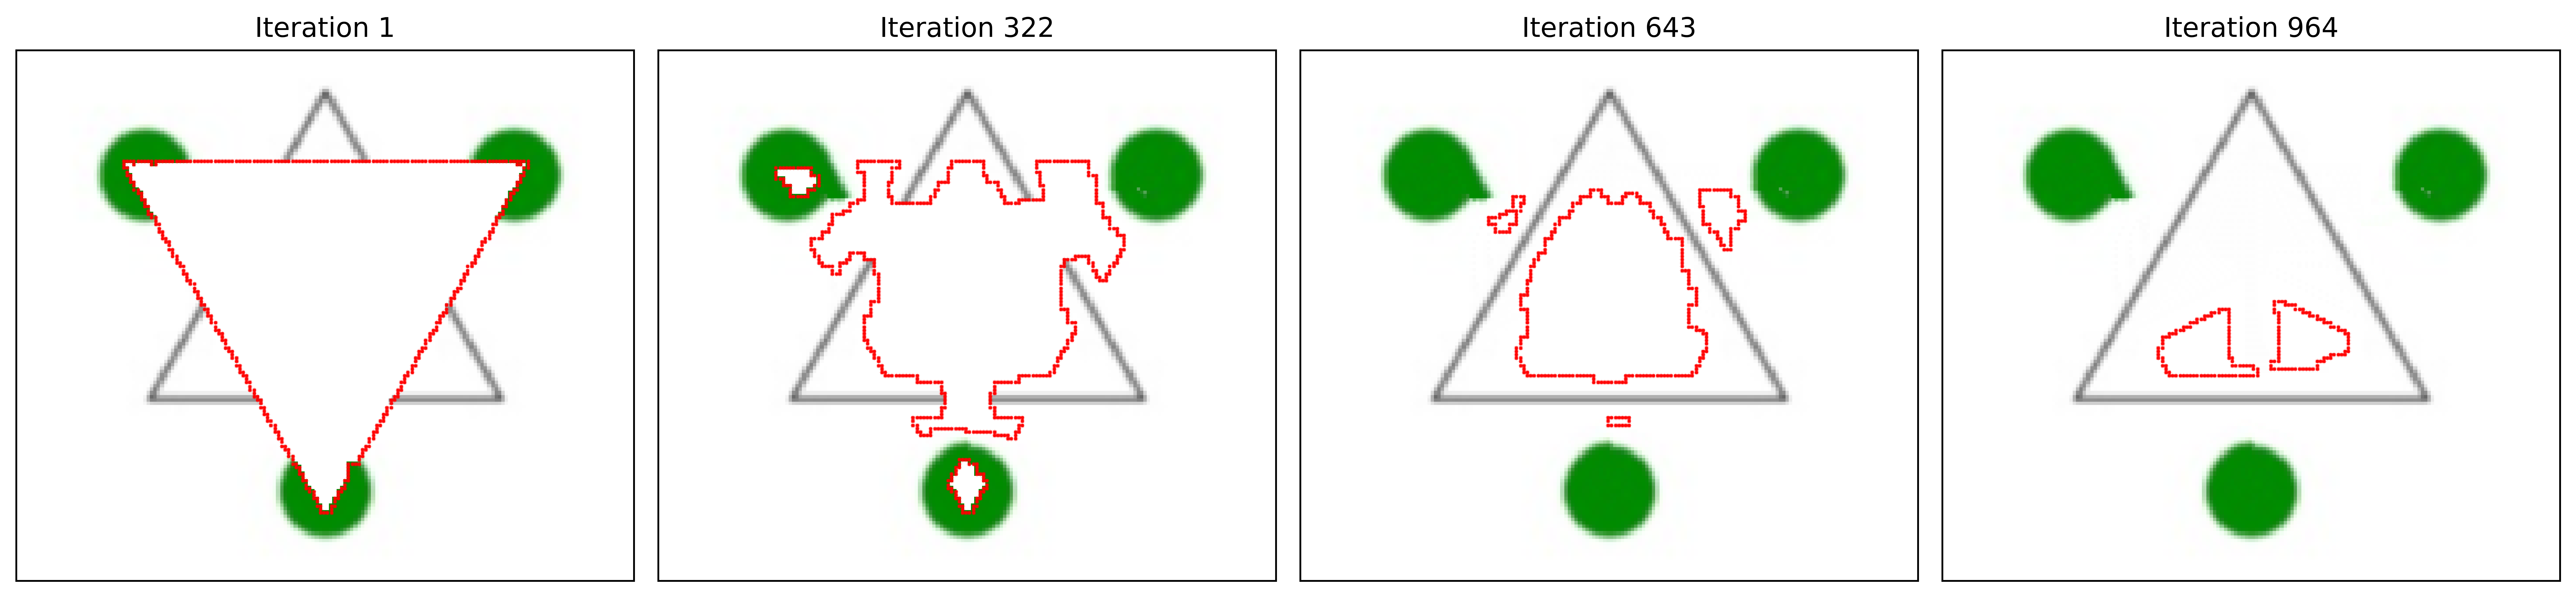

In [15]:
# Define the grid size and number of skips
grid_size = (1, 4)
num_skips = 320
width = 20
height = 5
fig, axes = plt.subplots(*grid_size)
fig.set_dpi(800)
fig.set_size_inches(width, height)

# Iterate over the grid and plot the images
for i, ax in enumerate(axes.flat):
    # Calculate the image index
    image_index = i * (num_skips + 1)+1
    
    # Load and plot the image
    image_path = f'./keniter/contour_img_{image_index}.png'
    image = plt.imread(image_path)
    
    # Set the size of each axes in the grid
    axes_size = (4, 4)  # Specify the size of each axes in inches
    fig.set_size_inches(axes_size[0] * grid_size[1], axes_size[1] * grid_size[0])
       
    # Adjust the spacing between subplots
    fig.subplots_adjust(wspace=0, hspace=0)
    
    # Remove axes labels
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    ax.imshow(image)
    ax.title.set_text(f'Iteration {image_index}')
  
# Adjust the spacing between subplots
fig.tight_layout()

# Show the grid of images
plt.show()

In [3]:
# Define the patch sizes
import time

# Create an empty dictionary to store the timings
timings = {}
patch_sizes = [3,4,5]
# Iterate over the patch sizes
for patch_size in patch_sizes:
    # Create a nested dictionary for each patch size
    timings[patch_size] = {}
    
    # Iterate over the imnum values
    for imnum in range(1, 5):
        print(f"Image {imnum}")
        name = f'self/im{imnum}.jpg'
        name_mask = f'self/mask{imnum}.jpg'

        img = cv2.imread(name)
        img_mask = cv2.imread(name_mask, cv2.IMREAD_GRAYSCALE)
        img_mask = cv2.bitwise_not(img_mask)
        img_mask = cv2.threshold(img_mask, 127, 255, cv2.THRESH_BINARY)[1]

        source_region_mask = (img_mask)
        source_indices_mask = np.array(np.where(source_region_mask == 255)).T

        # Start the timer
        start_time = time.time()

        # Call the in_paint_alg function
        inpaint_obj = inpaint.Inpainting(img, source_indices_mask, patch_size=patch_size)
        inpaint_obj.in_paint_alg(iterations=10000, name=f"im{imnum}self_patch{patch_size}", euclid=True,update_source=False)

        # Calculate the elapsed time
        elapsed_time = time.time() - start_time

        # Store the elapsed time in the dictionary
        timings[patch_size][imnum] = elapsed_time


Image 1
337 250


NameError: name 'timings' is not defined